Установка библиотеки

In [ ]:
!pip install blocksnet ipykernel -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.1/255.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
import geopandas as gpd

In [ ]:
pip install pandera==0.20.2

In [ ]:
import pandas as pd


In [ ]:
import osmnx as ox

In [ ]:
from google.colab import drive
import os

# Подключение к Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
boundary = ox.geocode_to_gdf('Приозерск')

<Axes: >

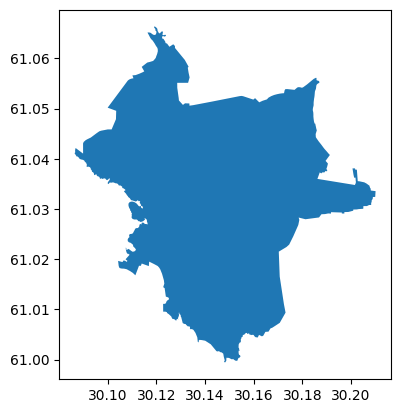

In [ ]:
boundary.plot()

In [ ]:
tags = {
    'roads': {
      "highway": ["construction","crossing","living_street","motorway","motorway_link","motorway_junction","pedestrian","primary","primary_link","raceway","residential","road","secondary","secondary_link","services","tertiary","tertiary_link","track","trunk","trunk_link","turning_circle","turning_loop","unclassified",],
      "service": ["living_street", "emergency_access"]
    },
    'railways': {
      "railway": "rail"
    },
    #water': {
    #  'water': 'lake'
    #}
}

Чтобы оно опять о послезавтра не загружалось, после загрузки сохраняем в файлы. Если это первый запуск, то убрать #

In [ ]:
#water = ox.features_from_polygon(boundary.unary_union, tags['water'])
roads = ox.features_from_polygon(boundary.unary_union, tags['roads'])
railways = ox.features_from_polygon(boundary.unary_union, tags['railways'])

In [ ]:
roads = roads[roads.geometry.geom_type.isin(["LineString", "MultiLineString"])]
#water = water[water.geometry.geom_type.isin(["LineString", "MultiLineString"])]
railways = railways[railways.geometry.geom_type.isin(["LineString", "MultiLineString"])]

In [ ]:
roads.to_file("roads.geojson", driver='GeoJSON')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

In [ ]:
#water.to_file("water.geojson", driver='GeoJSON')

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [ ]:
railways.to_file("railways.geojson", driver='GeoJSON')

In [ ]:
roads = gpd.read_file("/content/roads.geojson")
#water = gpd.read_file("/content/water.geojson")
railways = gpd.read_file("/content/railways.geojson")

In [ ]:
roads2 = gpd.read_file('/content/drive/MyDrive/AUTOMATED_PLANNING_175666_automated_planning_suggestion_1_layers.geojson')

<Axes: >

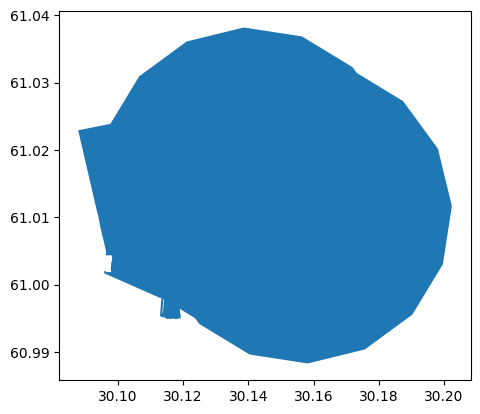

In [ ]:
roads2.plot()

In [ ]:
roads3 = roads2[roads2.geometry.geom_type.isin(["LineString", "MultiLineString", "LinearRing"])]

<Axes: >

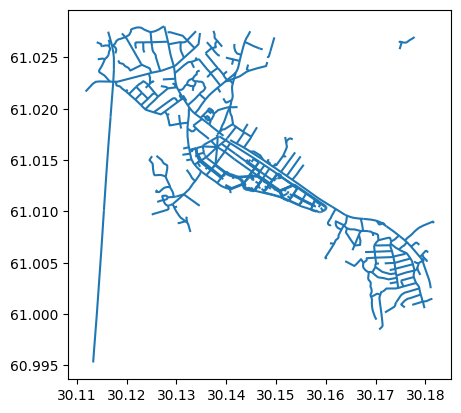

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
roads3.plot()

In [ ]:
roads4 = roads3.explode(index_parts=True).reset_index(drop=True)

In [ ]:
print(roads4.geom_type.unique())

['LineString']


In [ ]:
roads4.to_file("roads1.geojson", driver='GeoJSON')

In [ ]:
territory = gpd.read_file('/content/border.geojson')

# Убедитесь, что оба GeoDataFrame имеют одинаковую систему координат
if roads.crs != territory.crs:
    roads = roads.to_crs(territory.crs)

# Выполняем операцию difference
roads5 = gpd.overlay(roads4, territory, how='difference')


<Axes: >

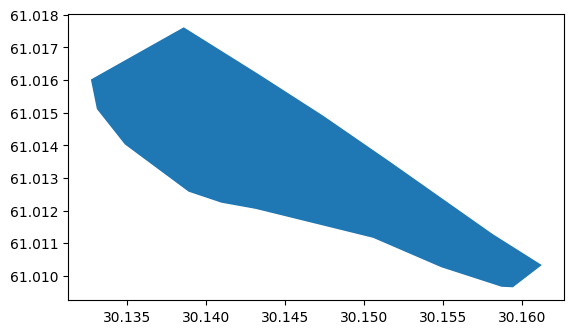

In [ ]:
territory.plot()

In [ ]:
roads5 = roads4.dropna(axis=1, how='all')

In [ ]:
roads6 = roads5.clip(territory)

<Axes: >

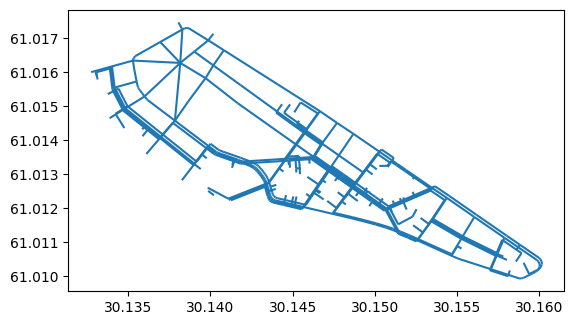

In [ ]:
roads6.plot()

In [ ]:
roads7 = roads6[
    (roads6['highway'].isin(['primary', 'residential', 'secondary']))
]

<Axes: >

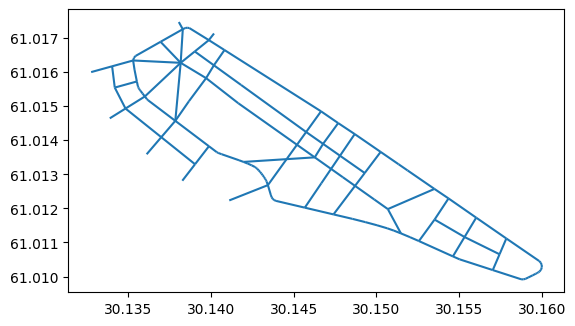

In [ ]:
roads7.plot()

In [ ]:
local_crs = boundary.estimate_utm_crs()

In [ ]:
boundary = boundary.reset_index()[['geometry']].to_crs(local_crs)
#water = water.reset_index()[['geometry']].to_crs(local_crs)
roads = roads.reset_index()[['geometry']].to_crs(local_crs)
railways = railways.reset_index()[['geometry']].to_crs(local_crs)

In [ ]:
roads7 = roads7.reset_index()[['geometry']].to_crs(local_crs)

In [ ]:
roads = pd.concat([
roads,
roads7
                    ], ignore_index=True)

In [ ]:
print(roads.geom_type.unique())

['LineString']


In [ ]:
import logging

# Настройка логгера
logging.basicConfig(level=logging.WARNING, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)


In [ ]:
#if water.geometry.isna().any():
#    logger.warning("Found NaN values in geometries")
#water = water[water.geometry.notna()]


In [ ]:
#roads.to_file("roadsw.geojson", driver='GeoJSON')

In [ ]:
#roads = gpd.read_file("/content/roadswr.geojson")

In [ ]:
#roads['geometry'] = roads['geometry'].buffer(0)

In [ ]:
#invalid_geometries = roads[~roads.geometry.is_valid]
#print(invalid_geometries)

In [ ]:
#roads = roads[~roads.geometry.is_empty]

In [ ]:
#empty_geometries = roads[roads.geometry.is_empty]
#print(empty_geometries)

In [ ]:
# print(roads.dtypes)

In [ ]:
# roads = roads.reset_index()[['geometry']].to_crs(local_crs)

In [ ]:
# roads.to_file("roads1.geojson", driver='GeoJSON')

In [ ]:
# Создаем словарь с данными
datasets = {
    "boundary": boundary,
    "roads": roads,
    "railways": railways#,
    #"water": water
}

# Проверяем данные на наличие корректных типов
for name, gdf in datasets.items():
    print(f"Проверяем типы данных в {name}...")

    # Убедимся, что 'geometry' является GeoSeries
    if not isinstance(gdf.geometry, gpd.GeoSeries):
        print(f"Ошибка: поле 'geometry' в {name} не является GeoSeries. Преобразуем...")
        gdf['geometry'] = gpd.GeoSeries(gdf['geometry'])

    # Проверяем остальные столбцы
    for col in gdf.columns:
        if isinstance(gdf[col], pd.Series) and col != 'geometry':
            print(f"Предупреждение: {col} является обычной Series, возможно требуется проверка.")

    # Убеждаемся, что GeoDataFrame остается валидным
    gdf = gpd.GeoDataFrame(gdf, geometry='geometry')

    # Обновляем объект
    datasets[name] = gdf

# Обновляем данные после проверки
boundary = datasets["boundary"]
roads = datasets["roads"]
railways = datasets["railways"]
#water = datasets["water"]


Проверяем типы данных в boundary...
Проверяем типы данных в roads...
Проверяем типы данных в railways...


In [ ]:
# Фильтруем GeoDataFrame water
#filtered_water = water[water.geom_type != "LineString"]

# Проверяем, что в GeoDataFrame остались данные
#if filtered_water.empty or filtered_water['geometry'].isna().all():
#    print("Предупреждение: слой 'water' пустой или содержит только некорректные геометрии.")
#    line_water = None  # Или установить GEOMETRYCOLLECTION EMPTY вручную, если требуется
#else:
#    # Убираем некорректные геометрии, если они есть
#    filtered_water = filtered_water[filtered_water.geometry.notna()]
#    filtered_water = filtered_water[filtered_water.is_valid]

    # Применяем unary_union
#    if not filtered_water.empty:
#        line_water = filtered_water.unary_union
#    else:
#        print("Предупреждение: после очистки слой 'water' пустой.")
#        line_water = None  # Или GEOMETRYCOLLECTION EMPTY


Предупреждение: слой 'water' пустой или содержит только некорректные геометрии.


In [ ]:
# Проверка на NaN и некорректные значения в каждом слое
for name, gdf in datasets.items():
    print(f"--- Проверяем слой {name} ---")
    print(f"Всего объектов: {len(gdf)}")
    print(f"Некорректные геометрии: {gdf[~gdf.is_valid].shape[0]}")
    print(f"NaN в геометриях: {gdf[gdf.geometry.isna()].shape[0]}")
    print(f"Inf координаты: {gdf[gdf.geometry.bounds.isin([float('inf'), float('-inf')]).any(axis=1)].shape[0]}")


--- Проверяем слой boundary ---
Всего объектов: 1
Некорректные геометрии: 0
NaN в геометриях: 0
Inf координаты: 0
--- Проверяем слой roads ---
Всего объектов: 567
Некорректные геометрии: 0
NaN в геометриях: 0
Inf координаты: 0
--- Проверяем слой railways ---
Всего объектов: 46
Некорректные геометрии: 0
NaN в геометриях: 0
Inf координаты: 0


In [ ]:
crs = boundary.crs  # Используем CRS границы
roads = roads.to_crs(crs)
railways = railways.to_crs(crs)
#water = water.to_crs(crs)


In [ ]:
# Диагностика перед очисткой
for name, gdf in datasets.items():
    print(f"\n--- Диагностика слоя {name} ---")
    print(f"Всего объектов: {len(gdf)}")
    print(f"NaN в геометриях: {gdf.geometry.isna().sum()}")
    print(f"Пустые геометрии: {gdf.geometry.is_empty.sum()}")
    print(f"Некорректные геометрии: {len(gdf[~gdf.is_valid])}")



--- Диагностика слоя boundary ---
Всего объектов: 1
NaN в геометриях: 0
Пустые геометрии: 0
Некорректные геометрии: 0

--- Диагностика слоя roads ---
Всего объектов: 567
NaN в геометриях: 0
Пустые геометрии: 0
Некорректные геометрии: 0

--- Диагностика слоя railways ---
Всего объектов: 46
NaN в геометриях: 0
Пустые геометрии: 0
Некорректные геометрии: 0


In [ ]:
from blocksnet import BlocksGenerator

bg = BlocksGenerator(boundary, roads, railways)

2024-12-24 00:27:57.213 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:99 - Check boundaries schema
2024-12-24 00:27:57.227 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:103 - Check roads schema
2024-12-24 00:27:57.238 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:109 - Check railways schema
2024-12-24 00:27:57.252 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:115 - Check water schema
2024-12-24 00:27:57.260 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:124 - Exclude water objects
/usr/local/lib/python3.10/dist-packages/blocksnet/preprocessing/blocks_generator.py:125: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  line_water = water[water.geom_type != "LineString"].unary_union


In [ ]:
blocks = bg.run()

2024-12-24 00:28:12.870 | INFO     | blocksnet.preprocessing.blocks_generator:run:161 - Generating blocks
2024-12-24 00:28:12.887 | INFO     | blocksnet.preprocessing.blocks_generator:run:170 - Setting up enclosures
2024-12-24 00:28:12.929 | INFO     | blocksnet.preprocessing.blocks_generator:run:174 - Filling holes
2024-12-24 00:28:12.961 | INFO     | blocksnet.preprocessing.blocks_generator:run:178 - Dropping overlapping blocks


GEOSException: IllegalArgumentException: CGAlgorithmsDD::orientationIndex encountered NaN/Inf numbers

С помощью библиотеки mapclassify мы можем выводить геометрии на карту через `.explore()`.

In [ ]:
!pip install mapclassify -q

In [ ]:
blocks.explore()

In [ ]:
buildings = ox.features_from_polygon(boundary.to_crs(4326).unary_union, {'building': True})

In [ ]:
buildings

In [ ]:
buildings = buildings.to_crs(local_crs).reset_index()[['geometry']]
buildings.geometry = buildings.representative_point()

In [ ]:
from blocksnet import BlocksSplitter

bs = BlocksSplitter(blocks, buildings)

In [ ]:
splitted_blocks = bs.run()

In [ ]:
len(blocks), len(splitted_blocks)

In [ ]:
blocks.plot(linewidth=0.1, figsize=(10,10)).set_axis_off()
splitted_blocks.plot(linewidth=0.1, figsize=(10,10)).set_axis_off()

In [ ]:
splitted_blocks.to_file('blocks.geojson')